# Prediction of car price

In [889]:
#importing required libraries
import pandas as pd
import numpy as np

In [890]:
df = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")

In [891]:
print(df.shape)
print(test.shape)

(6019, 13)
(1234, 12)


## 1.Exploratory data analysis

## Data cleaning

In [892]:
#checking NaN values
print(df.isnull().sum())
print(test.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [893]:
#removing New_Price column as it contains more null values
data = df.drop(columns = ['New_Price'] )
test = test.drop(columns = ['New_Price'])

In [894]:
#removing null values for Mileage by filling with mean
data['Mileage']=data['Mileage'].str.split(" ").str[0].astype('float64')#splitting the value and units and accessing only values
data['Mileage']=data['Mileage'].fillna(np.mean(data['Mileage']))

test['Mileage']=test['Mileage'].str.split(" ").str[0].astype('float64')

In [895]:
#removing null values for Engine by filling with mean
data['Engine']=data['Engine'].str.split(" ").str[0].astype('float64') #splitting the value and units and accessing only values
data['Engine']=data['Engine'].fillna(np.mean(data['Engine']))

test['Engine']=test['Engine'].str.split(" ").str[0].astype('float64') #splitting the value and units and accessing only values
test['Engine']=test['Engine'].fillna(np.mean(test['Engine']))

In [896]:
#removing null values for Seats by filling with mode
from scipy import stats
c= stats.mode(data['Seats'])
data['Seats'] = data['Seats'].fillna(c.mode[0])
data.loc[data.Seats == 0,'Seats'] = c.mode[0]          #replacing zero seats with mode 

c= stats.mode(test['Seats'])
test['Seats'] = test['Seats'].fillna(c.mode[0])
test.loc[test.Seats == 0,'Seats'] = c.mode[0]

In [897]:
#removing NaN values for Power by filling with mean
data['Power']=data['Power'].str.split(" ").str[0]
data.loc[data.Power == 'null','Power'] = '0'       #replacing 'null' string with '0'
data['Power']=data['Power'].astype('float64')      #converting to float
x=np.mean(data['Power'])
data['Power']=data['Power'].fillna(x)              #filling with mean
data.loc[data.Power == 0.00,'Power'] = x           #fillig 0.00 values with mean

test['Power']=test['Power'].str.split(" ").str[0]
test.loc[test.Power == 'null','Power'] = '0'       #replacing 'null' string with '0'
test['Power']=test['Power'].astype('float64')      #converting to float
x=np.mean(test['Power'])
test['Power']=test['Power'].fillna(x)              #filling with mean
test.loc[test.Power == 0.00,'Power'] = x  

In [898]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [899]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.204930,5.277621,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231913,0.803479,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [900]:
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,18.173857,1593.584967,110.328972,5.282010
std,3.179700,35598.702098,4.464615,562.054549,50.871542,0.822366
min,1996.000000,1000.000000,0.000000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.215000,1198.000000,76.200000,5.000000
50%,2014.000000,54572.500000,18.250000,1461.000000,98.600000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,126.300000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


In [901]:
#replacing 'ISUZU' from name column with 'Isuzu'
data['Name'] = data['Name'].str.split()
x = data.loc[data.Name.str[0] == 'ISUZU','Name']
for i in x.index:
    data['Name'][i][0] = 'Isuzu'

#replacing Land with Land Rover
y = data.loc[data.Name.str[0] == 'Land','Name']
for i in y.index:
   data['Name'][i][0] += data['Name'][i][1]
   del data['Name'][i][1]

#adding company column  to data with car names
data['Company'] = data['Name'].str[0]
data['Brand'] = data['Name'].str[1]

#removing Name column
data = data.drop(columns = ['Name'])


#replacing 'ISUZU' from name column with 'Isuzu'
test['Name'] = test['Name'].str.split()
x = test.loc[test.Name.str[0] == 'ISUZU','Name']
for i in x.index:
    test['Name'][i][0] = 'Isuzu'

#replacing Land with Land Rover
y = test.loc[test.Name.str[0] == 'Land','Name']
for i in y.index:
   test['Name'][i][0] += test['Name'][i][1]
   del test['Name'][i][1]

#adding company column  to data with car names
test['Company'] = test['Name'].str[0]
test['Brand'] = test['Name'].str[1]

#removing Name column
test = test.drop(columns = ['Name'])

In [902]:
#dropping them since they are not in test data
data = data[data.Fuel_Type != 'Electric']
data = data[data.Company != 'Smart']
data = data[data.Company != 'Ambassador']
data = data[data.Company != 'Force']
data = data[data.Company != 'Lamborghini']

In [903]:
test = test[test.Company != 'Hindustan']
test = test[test.Company != 'OpelCorsa']

In [904]:
print(data.shape)
print(test.shape)

(6011, 13)
(1232, 12)


## Visualizing the relationship between Price and other coiumns

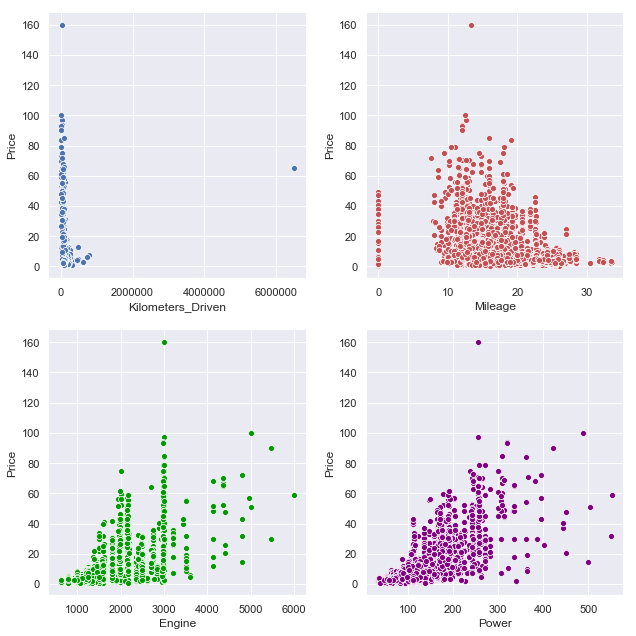

In [905]:
#finding the relationship of coliumns with price
fig, axs = plt.subplots(2, 2,figsize=(9, 9))
sns.despine(left=True)
sns.set(style="darkgrid")
sns.relplot(x= 'Kilometers_Driven',y='Price',data = data,ax=axs[0, 0]);
sns.relplot(x= 'Mileage',y='Price',data = data,ax=axs[0,1],color="r")
sns.relplot(x= 'Engine',y='Price',data = data,ax=axs[1,0],color="#009900")
sns.relplot(x= 'Power',y='Price',data = data,ax=axs[1,1],color="#800080");
fig.tight_layout()
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

#### Since the data is scattered with respect to Price it is better to use Random forest algorithm

# 2.Data Preprocessing

In [906]:
data.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [907]:
test.head(5);

In [908]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()          # instantiate labelencoder object

In [909]:
categorical_cols=['Year','Seats','Brand']
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))


test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col))

In [910]:
# #doing one hot encoding for required columns
list_onehot = ['Company','Location','Fuel_Type','Owner_Type','Transmission']
for i in list_onehot:
    encoded_columns1 = pd.get_dummies(data[i])
    encoded_columns2 = pd.get_dummies(test[i])
    data = data.join(encoded_columns1).drop(i, axis=1)
    test = test.join(encoded_columns2).drop(i, axis=1)

In [911]:
data_column = list(data.columns)
data_column.remove('Price')

In [912]:
l=[]
from scipy import stats
for i in data_column:
    statistic,p,dof,freq=stats.chi2_contingency(pd.crosstab(data[i],data['Price']))
    prob=0.90
    alpha=1-prob
    critical=stats.chi2.ppf(prob,dof)
    if abs(statistic)>=critical:
        l.append(i)
        print(i,":dependant")
    else:
        print(i,":independant")   
l

Year :dependant
Kilometers_Driven :dependant
Mileage :dependant
Engine :dependant
Power :dependant
Seats :dependant
Brand :dependant
Audi :dependant
BMW :dependant
Bentley :dependant
Chevrolet :independant
Datsun :independant
Fiat :independant
Ford :independant
Honda :independant
Hyundai :dependant
Isuzu :dependant
Jaguar :dependant
Jeep :dependant
LandRover :dependant
Mahindra :dependant
Maruti :independant
Mercedes-Benz :dependant
Mini :dependant
Mitsubishi :dependant
Nissan :independant
Porsche :dependant
Renault :independant
Skoda :independant
Tata :independant
Toyota :dependant
Volkswagen :independant
Volvo :dependant
Ahmedabad :independant
Bangalore :independant
Chennai :independant
Coimbatore :dependant
Delhi :independant
Hyderabad :independant
Jaipur :independant
Kochi :dependant
Kolkata :independant
Mumbai :independant
Pune :independant
CNG :independant
Diesel :dependant
LPG :independant
Petrol :dependant
First :independant
Fourth & Above :independant
Second :independant
Third

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Brand',
 'Audi',
 'BMW',
 'Bentley',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'LandRover',
 'Mahindra',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Porsche',
 'Toyota',
 'Volvo',
 'Coimbatore',
 'Kochi',
 'Diesel',
 'Petrol',
 'Automatic',
 'Manual']

In [913]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand,Audi,BMW,...,CNG,Diesel,LPG,Petrol,First,Fourth & Above,Second,Third,Automatic,Manual
count,6011.000000,6.011000e+03,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,...,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000
mean,15.360838,5.874743e+04,18.141384,1620.787215,113.149668,2.280319,9.462455,106.773582,0.039261,0.044419,...,0.009316,0.532357,0.001664,0.456663,0.819165,0.001497,0.160872,0.018466,0.285477,0.714523
std,3.267964,9.132397e+04,4.575509,597.603169,52.931230,0.792715,11.103143,64.252058,0.194232,0.206040,...,0.096078,0.498993,0.040757,0.498160,0.384914,0.038669,0.367443,0.134641,0.451679,0.451679
min,0.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.400000e+04,15.185000,1198.000000,78.000000,2.000000,3.500000,51.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,5.300000e+04,18.160000,1493.000000,98.600000,2.000000,5.630000,97.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18.000000,7.300000e+04,21.100000,1968.500000,138.030000,2.000000,9.950000,166.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,21.000000,6.500000e+06,33.540000,5998.000000,552.000000,7.000000,160.000000,208.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [914]:
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Audi,BMW,Bentley,...,CNG,Diesel,LPG,Petrol,First,Fourth & Above,Second,Third,Automatic,Manual
count,1232.000000,1232.000000,1232.00000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,...,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,12.422078,58508.923701,18.18039,1593.425203,110.348665,2.281656,80.886364,0.039773,0.036526,0.000812,...,0.004870,0.524351,0.001623,0.469156,0.830357,0.002435,0.147727,0.019481,0.267045,0.732955
std,3.130848,35626.303128,4.46529,562.364333,50.908839,0.804771,48.728096,0.195504,0.187671,0.028490,...,0.069644,0.499609,0.040275,0.499250,0.375471,0.049306,0.354974,0.138263,0.442596,0.442596
min,0.000000,1000.000000,0.00000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,34000.000000,15.26000,1198.000000,75.985000,2.000000,37.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,54572.500000,18.27500,1461.000000,98.600000,2.000000,79.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,75000.000000,21.10000,1968.000000,126.300000,2.000000,127.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18.000000,350000.000000,32.26000,5998.000000,616.000000,6.000000,160.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [915]:
test = pd.DataFrame(test,columns=l)
l.append('Price')
data = pd.DataFrame(data,columns=l)
data.describe()
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Audi,BMW,Bentley,...,Mitsubishi,Porsche,Toyota,Volvo,Coimbatore,Kochi,Diesel,Petrol,Automatic,Manual
count,1232.000000,1232.000000,1232.00000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,...,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,12.422078,58508.923701,18.18039,1593.425203,110.348665,2.281656,80.886364,0.039773,0.036526,0.000812,...,0.007305,0.000812,0.077922,0.005682,0.110390,0.098214,0.524351,0.469156,0.267045,0.732955
std,3.130848,35626.303128,4.46529,562.364333,50.908839,0.804771,48.728096,0.195504,0.187671,0.028490,...,0.085192,0.028490,0.268158,0.075194,0.313502,0.297725,0.499609,0.499250,0.442596,0.442596
min,0.000000,1000.000000,0.00000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,34000.000000,15.26000,1198.000000,75.985000,2.000000,37.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,54572.500000,18.27500,1461.000000,98.600000,2.000000,79.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,15.000000,75000.000000,21.10000,1968.000000,126.300000,2.000000,127.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,18.000000,350000.000000,32.26000,5998.000000,616.000000,6.000000,160.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [916]:
#importing required library in order to do normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [917]:
Engine_numpy = data['Engine'].to_numpy().reshape(-1,1)  #coverting Engine to numpy array and reshaping to 6019x1
data['Engine'] = scaler.fit_transform(X = Engine_numpy) #normalization

Engine_numpy = test['Engine'].to_numpy().reshape(-1,1)  #coverting Engine to numpy array and reshaping to 6019x1
test['Engine'] = scaler.fit_transform(X = Engine_numpy) #normalization

In [918]:
kd_numpy = data['Kilometers_Driven'].to_numpy().reshape(-1,1)#coverting Kilometers_Driven to numpyarray and reshaping to 6019x1
data['Kilometers_Driven'] = scaler.fit_transform(X = kd_numpy)  #normalization

kd_numpy = test['Kilometers_Driven'].to_numpy().reshape(-1,1)#coverting Kilometers_Driven to numpyarray and reshaping to 6019x1
test['Kilometers_Driven'] = scaler.fit_transform(X = kd_numpy)  #normalization

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [919]:
Power_numpy =data['Power'].to_numpy().reshape(-1,1)       #coverting Power to numpy array and reshaping to 6019x1
data['Power'] = scaler.fit_transform(X = Power_numpy)   #normalization

Power_numpy =test['Power'].to_numpy().reshape(-1,1)       #coverting Power to numpy array and reshaping to 6019x1
test['Power'] = scaler.fit_transform(X = Power_numpy)   #normalization

In [920]:
data.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Audi,BMW,Bentley,...,Porsche,Toyota,Volvo,Coimbatore,Kochi,Diesel,Petrol,Automatic,Manual,Price
0,12,0.011051,26.60,0.069594,0.046273,2,186,0,0,0,...,0,0,0,0,0,0,0,0,1,1.75
1,17,0.006282,19.67,0.178266,0.177675,2,53,0,0,0,...,0,0,0,0,0,1,0,0,1,12.50
2,13,0.007051,18.20,0.106997,0.105253,2,98,0,0,0,...,0,0,0,0,0,0,1,0,1,4.50
3,14,0.013359,20.77,0.116115,0.105369,4,69,0,0,0,...,0,0,0,0,0,1,0,0,1,6.00
4,15,0.006231,15.20,0.250093,0.205871,2,10,1,0,0,...,0,0,0,1,0,1,0,1,0,17.74


In [921]:
test.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Audi,BMW,Bentley,...,Mitsubishi,Porsche,Toyota,Volvo,Coimbatore,Kochi,Diesel,Petrol,Automatic,Manual
0,13,0.114410,32.26,0.069594,0.041251,1,15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,0.153275,24.70,0.032006,0.022516,2,15,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,16,0.094556,13.68,0.329178,0.195256,4,79,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,11,0.395415,23.59,0.137700,0.127529,2,60,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,13,0.080229,18.50,0.106624,0.083620,2,159,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Finding and removing outliers

In [922]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

data = data[(z < 3).all(axis=1)]

[[1.02850512 0.14512806 1.84882597 ... 0.63208729 0.63208729 0.69467688]
 [0.50162662 0.19435102 0.33411432 ... 0.63208729 0.63208729 0.27359794]
 [0.72247877 0.13959633 0.01281185 ... 0.63208729 0.63208729 0.44697867]
 ...
 [0.41645242 0.04103789 0.9051952  ... 0.63208729 0.63208729 0.591094  ]
 [0.11042608 0.13959633 0.16581303 ... 0.63208729 0.63208729 0.61361202]
 [0.72247877 0.1286454  1.59528116 ... 0.63208729 0.63208729 0.62712283]]
(array([   4,    7,    7, ..., 6004, 6008, 6008], dtype=int64), array([ 7,  5, 20, ..., 20,  5, 15], dtype=int64))


In [923]:
test.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Audi,BMW,Bentley,...,Mitsubishi,Porsche,Toyota,Volvo,Coimbatore,Kochi,Diesel,Petrol,Automatic,Manual
0,13,0.114410,32.26,0.069594,0.041251,1,15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,0.153275,24.70,0.032006,0.022516,2,15,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,16,0.094556,13.68,0.329178,0.195256,4,79,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,11,0.395415,23.59,0.137700,0.127529,2,60,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,13,0.080229,18.50,0.106624,0.083620,2,159,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [924]:
#removing price column from data 
data_column = list(data.columns)
data_column.remove('Price')
X = data[data_column].values

# 3.Training data

In [925]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['Price'], test_size=0.2, random_state=0)

In [926]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [927]:
#training data
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [928]:
#predicting train data to detect overfitting and underfitting
y_pred1 = clf.predict(X_train)

In [929]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1)))

Mean Absolute Error: 0.2900318996415771
Mean Squared Error: 0.20425362384657506
Root Mean Squared Error: 0.4519442707309996


In [930]:
#predicting test data
y_pred = clf.predict(X_test)

In [931]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6977275258552109
Mean Squared Error: 0.9695843592382657
Root Mean Squared Error: 0.9846747479438405


In [932]:
df_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

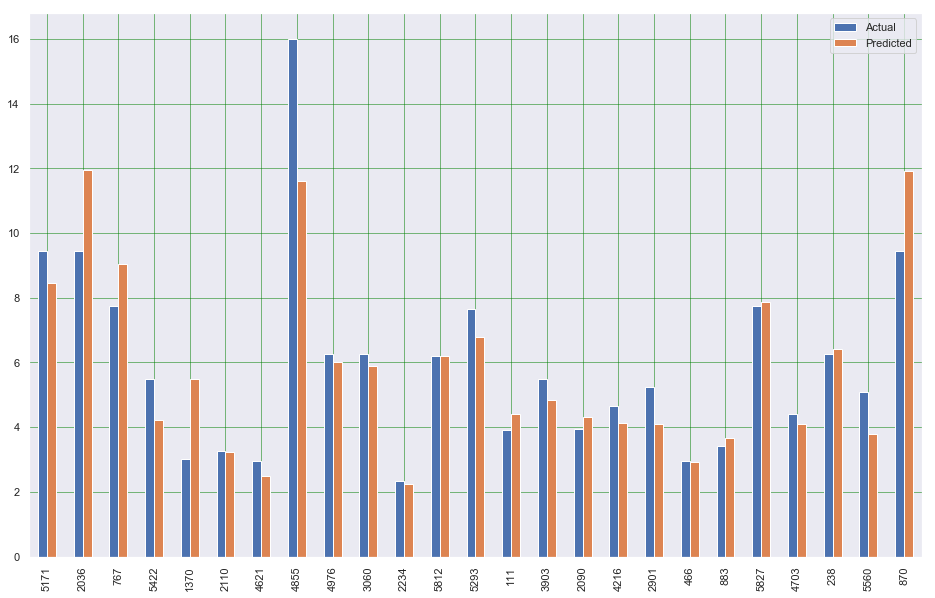

In [933]:
#Will take 25 records and visualize
df1 = df_prediction.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [934]:
import sklearn.metrics
metrics.r2_score(y_test,y_pred)

0.9223566570364918

# 4.Testing data using Random Forest Regressor

In [935]:
y_pred = clf.predict(test)

In [936]:
y_pred

array([1.319, 1.693, 9.495, ..., 2.035, 2.352, 7.671])

In [937]:
Price = pd.DataFrame(y_pred,columns =['Price'])

In [938]:
Price.to_excel("Predicted price.xlsx",index=False)